### 데이터 준비

In [1]:
import pandas as pd
cols = ["기업", "연도", "현재_주가", "미래_주가", "영업이익_상태", "당기순이익_상태"]
data = pd.read_csv("../../데이터/재무제표_분석용데이터.csv",
                   usecols = cols,
                   encoding="euc-kr")

In [2]:
data.dropna(inplace = True)

### 환경 설정

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 데이터 탐색 및 시각화

#### 상태 변수 분포 확인

In [5]:
display(data['영업이익_상태'].value_counts(normalize = True))

흑자지속    0.662745
적자지속    0.139608
흑자전환    0.100549
적자전환    0.097098
Name: 영업이익_상태, dtype: float64

In [6]:
display(data['당기순이익_상태'].value_counts(normalize = True))

흑자지속    0.568863
적자지속    0.188078
흑자전환    0.122980
적자전환    0.120078
Name: 당기순이익_상태, dtype: float64

#### 상태에 따른 수익률 시각화

In [7]:
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100

Text(0, 0.5, '수익률')

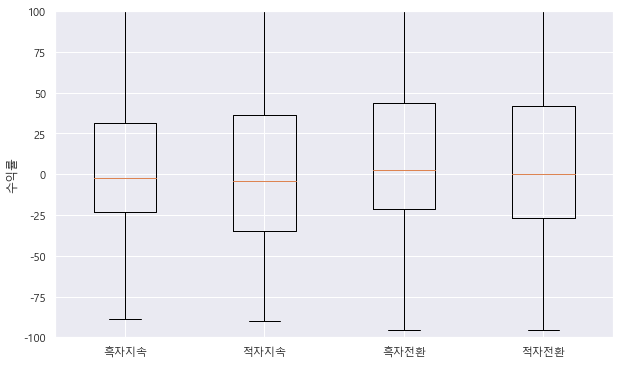

In [8]:
# 영업이익 상태에 따른 수익률 시각화
plt.figure(figsize = (10, 6))
graph_data = []
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    value = data.loc[data["영업이익_상태"] == state, "수익률"]
    graph_data.append(value)
plt.boxplot(graph_data)
plt.ylim(-100, 100)
plt.xticks([1, 2, 3, 4], ["흑자지속", "적자지속", "흑자전환", "적자전환"])
plt.ylabel("수익률")

Text(0, 0.5, '수익률')

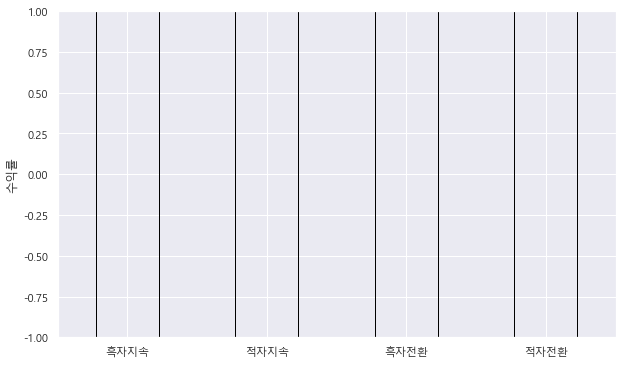

In [9]:
# 당기순이익 상태에 따른 수익률 시각화
plt.figure(figsize = (10, 6))
graph_data = []
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    value = data.loc[data["당기순이익_상태"] == state, "수익률"]
    graph_data.append(value)
plt.boxplot(graph_data)
plt.ylim(-1, 1)
plt.xticks([1, 2, 3, 4], ["흑자지속", "적자지속", "흑자전환", "적자전환"])
plt.ylabel("수익률")

#### 상태에 따른 수익률 통계량 확인

In [10]:
display(data.groupby(['영업이익_상태'])['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
영업이익_상태,,,,,,,,
적자전환,1238.0,21.06,87.04,-95.50,-27.14,0.00,41.80,809.66
적자지속,1780.0,19.19,108.78,-89.87,-34.76,-3.99,36.16,1863.16
흑자전환,1282.0,27.49,98.93,-95.50,-21.25,2.34,43.48,1603.51
흑자지속,8450.0,15.18,70.07,-89.08,-23.35,-2.08,31.41,2202.02


In [11]:
display(data.groupby(['당기순이익_상태'])['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
당기순이익_상태,,,,,,,,
적자전환,1531.0,20.51,81.35,-95.50,-26.72,-1.38,42.64,809.66
적자지속,2398.0,20.14,110.07,-89.87,-33.35,-4.39,36.00,1863.16
흑자전환,1568.0,24.35,81.11,-95.50,-19.98,1.76,40.66,1066.29
흑자지속,7253.0,14.59,69.47,-89.08,-23.14,-2.06,30.29,2202.02


### 동일 가중 교체 매매 방법에 따른 수익 비교

#### 영업이익 상태 기준

In [12]:
result = []
for year in range(2014, 2020):
    y_data = data.loc[data['연도'] == year]
    for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
        # 영업이익 상태와 연도에 따른 수익률 정의 
        ror_list = y_data.loc[data["영업이익_상태"] == state, "수익률"]
        inve_per_stock = 10 ** 8 / len(ror_list) # 종목별 투자금 계산
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, state, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "상태", "수익률"]) 

Text(0.5, 0, '연도')

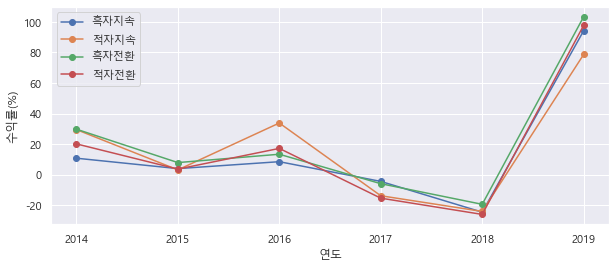

In [13]:
plt.figure(figsize = (10, 4))
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    graph_data = result.loc[(result['상태'] ==  state), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = state)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률(%)")
plt.xlabel("연도")

In [14]:
display(result.groupby('상태')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
상태,,,,,,,,
적자전환,6.0,16.18,43.84,-26.07,-10.67,10.37,19.37,97.74
적자지속,6.0,17.84,37.60,-24.11,-9.61,16.28,32.70,78.66
흑자전환,6.0,21.48,43.48,-19.46,-2.50,10.60,25.64,103.36
흑자지속,6.0,14.71,41.00,-24.61,-2.36,6.19,10.16,94.22


#### 당기순이익 상태 기준

In [15]:
result = []
for year in range(2014, 2020):
    y_data = data.loc[data['연도'] == year]
    for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
        # 당기순이익 상태와 연도에 따른 수익률 정의 
        ror_list = y_data.loc[data["당기순이익_상태"] == state, "수익률"]
        inve_per_stock = 10 ** 8 / len(ror_list) # 종목별 투자금 계산
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, state, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "상태", "수익률"]) 

Text(0.5, 0, '연도')

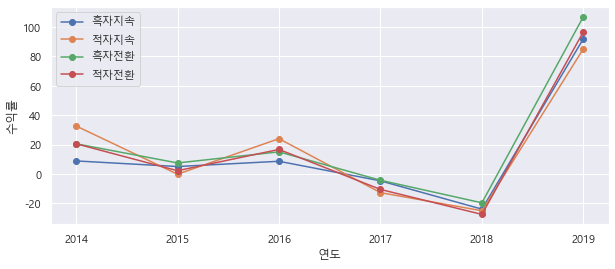

In [16]:
plt.figure(figsize = (10, 4))
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    graph_data = result.loc[(result['상태'] ==  state), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = state)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [17]:
display(result.groupby('상태')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
상태,,,,,,,,
적자전환,6.0,16.32,43.23,-27.61,-7.40,9.41,19.56,96.76
적자지속,6.0,17.29,39.75,-25.13,-9.63,11.88,30.50,85.17
흑자전환,6.0,20.99,44.56,-19.72,-1.40,11.22,19.13,107.06
흑자지속,6.0,14.28,40.05,-24.02,-2.30,6.80,8.76,92.03
